In [6]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from pygpudrive.env.dataset import SceneDataLoader
from pygpudrive.env.config import EnvConfig
from pygpudrive.env.env_torch import GPUDriveTorchEnv

### Dataset

In [7]:
train_loader = SceneDataLoader(
    root="data/processed/training",
    batch_size=1, # Number of worlds
    dataset_size=1,
    sample_with_replacement=True,
)

In [8]:
train_loader.dataset

['data/processed/training/tfrecord-00000-of-01000_1.json']

### GPUDriveTorchEnv

In [9]:
env = GPUDriveTorchEnv(
    config=EnvConfig(),
    data_loader=train_loader,
    max_cont_agents=128, 
    device="cpu",
)

obs = env.reset()[env.cont_agent_mask]

In [10]:
print(f'observation_space: {env.observation_space}')
print(f'obs shape: {obs.shape}')
print(f'obs dtype: {obs.dtype} \n')

print(f'action_space: {env.action_space}')

observation_space: Box(-inf, inf, (3368,), float32)
obs shape: torch.Size([9, 3368])
obs dtype: torch.float32 

action_space: Discrete(672)


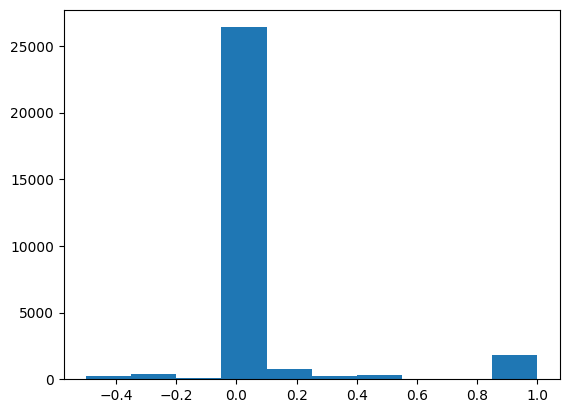

In [11]:
plt.hist(obs.flatten());

### PufferEnv


In [12]:
from integrations.rl.puffer.puffer_env import PufferGPUDrive

puffer_env = PufferGPUDrive(
    data_loader=train_loader,
    device="cpu",
    config=EnvConfig(),
    train_config=None,
)

puffer_obs = puffer_env.observations

puffer_env.controlled_agent_mask.sum()

tensor(9)

In [13]:
print(f'observation_space: {puffer_env.observation_space}')
print(f'obs shape: {puffer_obs.shape}')
print(f'obs dtype: {puffer_obs.dtype} \n')

print(f'action_space: {puffer_env.action_space}')

observation_space: Box(0.0, 255.0, (9, 3368), float32)
obs shape: (9, 3368)
obs dtype: float32 

action_space: MultiDiscrete([672 672 672 672 672 672 672 672 672])


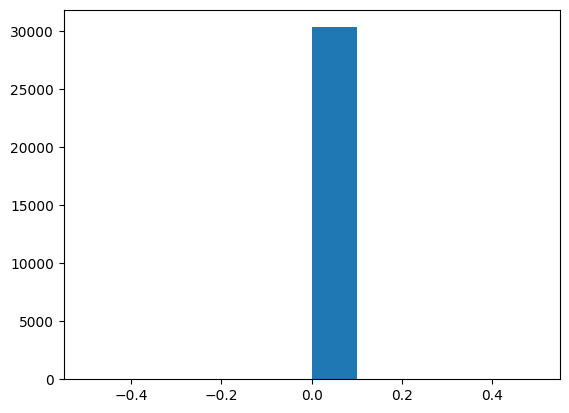

In [14]:
plt.hist(puffer_obs.flatten());